In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
import pandas as pd
import os

# Ruta de los chunks y processed_data
chunks_path = "/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_chunked_keep/"
processed_data_path = "/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/processed_data_validation.csv"

# Cargar todos los chunks de embeddings
def load_all_chunks(chunks_path, prefix):
    """
    Carga y combina todos los chunks de embeddings guardados.
    Args:
        chunks_path (str): Ruta donde están almacenados los chunks.
        prefix (str): Prefijo común de los archivos de embeddings.
    Returns:
        torch.Tensor: Embeddings combinados.
    """
    embeddings = []
    for i in range(1, 46):  # Ajusta según el número de chunks
        chunk_file = os.path.join(chunks_path, f"{prefix}_chunk_{i}.pt")
        print(f"Cargando {chunk_file}...")
        chunk = torch.load(chunk_file)
        embeddings.append(chunk)
    return torch.cat(embeddings, dim=0)

# Cargar embeddings
embeddings_keep_specials = load_all_chunks(chunks_path, "embeddings_keep_specials_validation")

# Cargar el DataFrame procesado
data_validation = pd.read_csv(processed_data_path)

# Verificar dimensiones
print(f"Dimensiones de los embeddings: {embeddings_keep_specials.shape}")
print(f"Dimensiones del DataFrame: {data_validation.shape}")


Cargando /content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_chunked_keep/embeddings_keep_specials_validation_chunk_1.pt...


<ipython-input-3-fa9641d11fe2>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  chunk = torch.load(chunk_file)


Cargando /content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_chunked_keep/embeddings_keep_specials_validation_chunk_2.pt...
Cargando /content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_chunked_keep/embeddings_keep_specials_validation_chunk_3.pt...
Cargando /content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_chunked_keep/embeddings_keep_specials_validation_chunk_4.pt...
Cargando /content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_chunked_keep/embeddings_keep_specials_validation_chunk_5.pt...
Cargando /content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_chunked_keep/embeddings_keep_specials_validation_chunk_6.pt...
Cargando /content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_chunked_keep/embeddings_keep_specials_validation_chunk_7.pt...
Cargando /content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/dat

In [4]:
import joblib
import xgboost as xgb
import lightgbm as lgb
from tensorflow.keras.models import load_model

# Cargar Logistic Regression
logistic_model = joblib.load("/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/modelos/logistic_regression_model_keepspecials.pkl")

# Cargar XGBoost
xgboost_model = xgb.Booster()
xgboost_model.load_model("/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/modelos/xgboost_model_keepspecials.json")

# Cargar LightGBM
lightgbm_model = lgb.Booster(model_file="/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/modelos/lightgbm_model_keepspecials.txt")

# Cargar Neural Network
neural_network_model = load_model("/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/modelos/neural_network_model_keepspecials.h5")

print("Modelos cargados correctamente.")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Modelos cargados correctamente.


In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import xgboost as xgb

# Convertir embeddings a CPU y luego a numpy
X_validation = embeddings_keep_specials.cpu().numpy()

# Predicciones con Logistic Regression
logistic_preds = logistic_model.predict(X_validation)
logistic_probs = logistic_model.predict_proba(X_validation)[:, 1]

# Crear DMatrix para los datos de validación
dmatrix_validation = xgb.DMatrix(X_validation)

# Predicciones con XGBoost
xgboost_preds = xgboost_model.predict(dmatrix_validation)
xgboost_probs = xgboost_model.predict(dmatrix_validation, output_margin=False)

# Predicciones con LightGBM
lightgbm_preds = lightgbm_model.predict(X_validation)
lightgbm_probs = (lightgbm_preds > 0.5).astype(int)

# Predicciones con Neural Network
neural_probs = neural_network_model.predict(X_validation).flatten()
neural_preds = (neural_probs > 0.5).astype(int)

print("Predicciones realizadas correctamente.")


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Predicciones realizadas correctamente.


In [6]:
data_validation.head().T

,0,1,2,3,4
text,Phones\n\nModern humans today are always on th...,This essay will explain if drivers should or s...,Driving while the use of cellular devices\n\nT...,Phones & Driving\n\nDrivers should not be able...,Cell Phone Operation While Driving\n\nThe abil...
label,0,0,0,0,0
prompt_name,Phones and driving,Phones and driving,Phones and driving,Phones and driving,Phones and driving
source,persuade_corpus,persuade_corpus,persuade_corpus,persuade_corpus,persuade_corpus
RDizzl3_seven,False,False,False,False,False
text_clean_specials_removed,phones modern humans today are always on their...,this essay will explain if drivers should or s...,driving while the use of cellular devices toda...,phones driving drivers should not be able to u...,cell phone operation while driving the ability...
text_clean_keep_specials,phones modern humans today are always on their...,this essay will explain if drivers should or s...,driving while the use of cellular devices toda...,phones & driving drivers should not be able to...,cell phone operation while driving the ability...
tokens_specials_removed,"['▁phones', '▁modern', '▁humans', '▁today', '▁...","['▁this', '▁essay', '▁will', '▁explain', '▁if'...","['▁driving', '▁while', '▁the', '▁use', '▁of', ...","['▁phones', '▁driving', '▁drivers', '▁should',...","['▁cell', '▁phone', '▁operation', '▁while', '▁..."
tokens_keep_specials,"['▁phones', '▁modern', '▁humans', '▁today', '▁...","['▁this', '▁essay', '▁will', '▁explain', '▁if'...","['▁driving', '▁while', '▁the', '▁use', '▁of', ...","['▁phones', '▁&', '▁driving', '▁drivers', '▁sh...","['▁cell', '▁phone', '▁operation', '▁while', '▁..."


In [7]:
# Etiquetas verdaderas
y_true = data_validation['label'].values  # Ajusta si el nombre de la columna es diferente

# Evaluar cada modelo
def evaluate_model(y_true, preds, probs, model_name):
    print(f"\nEvaluación para {model_name}:")
    print(f"Exactitud: {accuracy_score(y_true, preds):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, probs):.4f}")
    print("Reporte de Clasificación:")
    print(classification_report(y_true, preds))

# Evaluar Logistic Regression
evaluate_model(y_true, logistic_preds, logistic_probs, "Logistic Regression")

# Convertir probabilidades continuas a etiquetas binarias
xgboost_preds_binary = (xgboost_preds > 0.5).astype(int)

# Evaluar XGBoost
evaluate_model(y_true, xgboost_preds_binary, xgboost_probs, "XGBoost")

# Evaluar LightGBM
evaluate_model(y_true, lightgbm_probs, lightgbm_preds, "LightGBM")

# Evaluar Neural Network
evaluate_model(y_true, neural_preds, neural_probs, "Neural Network")



Evaluación para Logistic Regression:
Exactitud: 0.9522
AUC-ROC: 0.9960
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     27371
           1       0.90      0.99      0.94     17497

    accuracy                           0.95     44868
   macro avg       0.95      0.96      0.95     44868
weighted avg       0.96      0.95      0.95     44868


Evaluación para XGBoost:
Exactitud: 0.9499
AUC-ROC: 0.9915
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     27371
           1       0.90      0.98      0.94     17497

    accuracy                           0.95     44868
   macro avg       0.94      0.96      0.95     44868
weighted avg       0.95      0.95      0.95     44868


Evaluación para LightGBM:
Exactitud: 0.9529
AUC-ROC: 0.9894
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Convertir predicciones continuas de LightGBM a etiquetas binarias
lightgbm_preds_binary = (lightgbm_preds > 0.5).astype(int)


In [9]:


# Crear el resumen de resultados
results = {
    "Modelo": ["Logistic Regression", "XGBoost", "LightGBM", "Neural Network"],
    "Exactitud": [
        accuracy_score(y_true, logistic_preds),
        accuracy_score(y_true, xgboost_preds_binary),  # Usar predicciones binarias
        accuracy_score(y_true, lightgbm_preds_binary),  # Usar predicciones binarias
        accuracy_score(y_true, neural_preds)
    ],
    "AUC-ROC": [
        roc_auc_score(y_true, logistic_probs),
        roc_auc_score(y_true, xgboost_probs),  # Probabilidades continuas para AUC
        roc_auc_score(y_true, lightgbm_probs),  # Probabilidades continuas para AUC
        roc_auc_score(y_true, neural_probs)
    ]
}

import pandas as pd
results_df = pd.DataFrame(results)
print("\nResumen de Resultados:")
print(results_df)



Resumen de Resultados:
                Modelo  Exactitud   AUC-ROC
0  Logistic Regression   0.952238  0.996023
1              XGBoost   0.949897  0.991484
2             LightGBM   0.952906  0.958978
3       Neural Network   0.954444  0.995700


In [10]:
results_df.loc[0,'Precisión'] = precision_score(y_true, logistic_preds, zero_division=0)
results_df.loc[1,'Precisión'] = precision_score(y_true, xgboost_preds_binary, zero_division=0)
results_df.loc[2,'Precisión'] = precision_score(y_true, lightgbm_preds_binary, zero_division=0)
results_df.loc[3,'Precisión'] = precision_score(y_true, neural_preds, zero_division=0)

results_df.loc[0,'F1-Score'] = f1_score(y_true, logistic_preds, zero_division=0)
results_df.loc[1,'F1-Score'] = f1_score(y_true, xgboost_preds_binary, zero_division=0)
results_df.loc[2,'F1-Score'] = f1_score(y_true, lightgbm_preds_binary, zero_division=0)
results_df.loc[3,'F1-Score'] = f1_score(y_true, neural_preds, zero_division=0)

results_df.loc[0,'Recall'] = recall_score(y_true, logistic_preds, zero_division=0)
results_df.loc[1,'Recall'] = recall_score(y_true, xgboost_preds_binary, zero_division=0)
results_df.loc[2,'Recall'] = recall_score(y_true, lightgbm_preds_binary, zero_division=0)
results_df.loc[3,'Recall'] = recall_score(y_true, neural_preds, zero_division=0)


In [11]:
results_df

,Modelo,Exactitud,AUC-ROC,Precisión,F1-Score,Recall
0,Logistic Regression,0.952238,0.996023,0.896130,0.941888,0.992570
1,XGBoost,0.949897,0.991484,0.899042,0.938586,0.981768
2,LightGBM,0.952906,0.958978,0.901881,0.942326,0.986569
3,Neural Network,0.954444,0.995700,0.901231,0.944387,0.991884


Generando matrices de confusión con métricas...


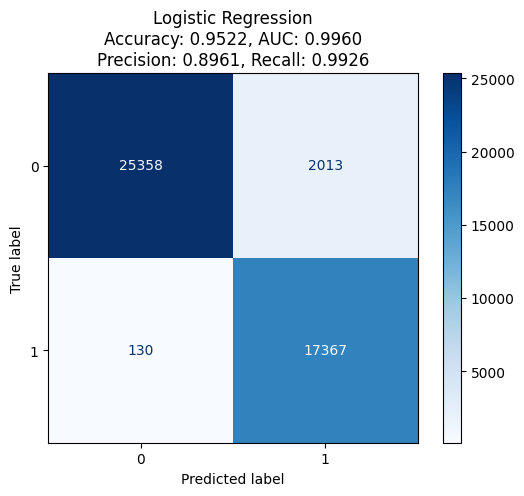

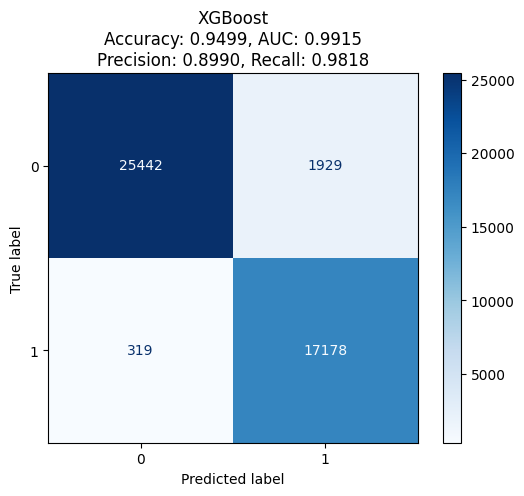

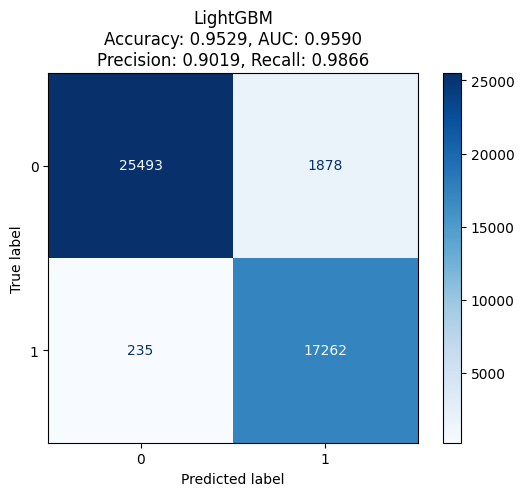

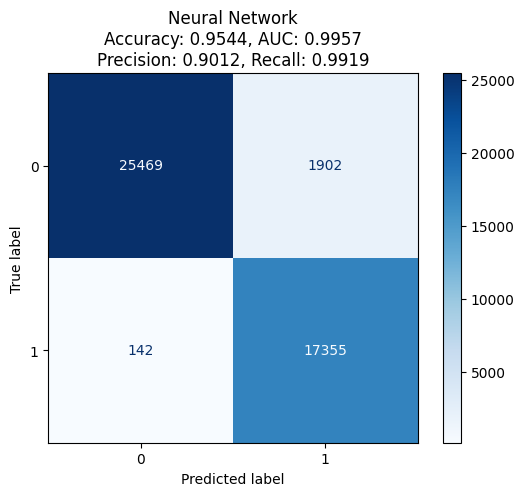

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score

# Función para graficar la matriz de confusión con métricas
def plot_confusion_matrix_with_metrics(y_true, y_pred, probs, model_name):
    """
    Grafica la matriz de confusión con las métricas de evaluación.
    Args:
        y_true (array): Etiquetas verdaderas.
        y_pred (array): Predicciones del modelo.
        probs (array): Probabilidades predichas del modelo.
        model_name (str): Nombre del modelo.
    """
    # Calcular métricas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, probs)

    # Generar la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)

    # Añadir las métricas al título
    plt.title(
        f"{model_name}\n"
        f"Accuracy: {accuracy:.4f}, AUC: {auc:.4f}\n"
        f"Precision: {precision:.4f}, Recall: {recall:.4f}"
    )
    plt.show()

# Generar y graficar las matrices de confusión para cada modelo con métricas
print("Generando matrices de confusión con métricas...")

# Logistic Regression
plot_confusion_matrix_with_metrics(y_true, logistic_preds, logistic_probs, "Logistic Regression")

# XGBoost
plot_confusion_matrix_with_metrics(y_true, xgboost_preds_binary, xgboost_probs, "XGBoost")

# LightGBM
plot_confusion_matrix_with_metrics(y_true, lightgbm_preds_binary, lightgbm_probs, "LightGBM")

# Neural Network
plot_confusion_matrix_with_metrics(y_true, neural_preds, neural_probs, "Neural Network")


In [13]:
data_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   text                         44868 non-null  object
 1   label                        44868 non-null  int64 
 2   prompt_name                  44868 non-null  object
 3   source                       44868 non-null  object
 4   RDizzl3_seven                44868 non-null  bool  
 5   text_clean_specials_removed  44868 non-null  object
 6   text_clean_keep_specials     44868 non-null  object
 7   tokens_specials_removed      44868 non-null  object
 8   tokens_keep_specials         44868 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 2.8+ MB


In [39]:
#Convertir el array en DataFrame con una sola columna y luego renombrarla
data_prob_log = pd.DataFrame(logistic_probs, columns=['logistic_probs'])
# Concatenar los DataFrames por columnas
log_data = pd.concat([data_validation, data_prob_log], axis=1)
log_data_sorted = log_data.sort_values(by=['logistic_probs'], ascending=True)

log_data_sorted['tranche'] = pd.qcut(log_data_sorted['logistic_probs'], q=20, labels=False)



In [50]:
grupos = log_data_sorted.groupby('tranche')

# Mostrar resultados
for nombre, grupo in grupos:
    print(f"Grupo: {nombre}")
    min_prob = grupo['logistic_probs'].min()
    max_prob = grupo['logistic_probs'].max()
    print(f"Rango de Probabilidades: [{min_prob:.4f}, {max_prob:.4f}]")

    # Número total de textos en el tramo
    total_texts = len(grupo)
    print(f"Número total de textos: {total_texts}")

    # Opcional: Puedes mostrar algunos ejemplos de textos si lo deseas
    #print(grupo[['text', 'logistic_probs']].head())


Grupo: 0
Rango de Probabilidades: [0.0000, 0.0001]
Número total de textos: 2244
Grupo: 1
Rango de Probabilidades: [0.0001, 0.0005]
Número total de textos: 2243
Grupo: 2
Rango de Probabilidades: [0.0005, 0.0014]
Número total de textos: 2244
Grupo: 3
Rango de Probabilidades: [0.0014, 0.0035]
Número total de textos: 2243
Grupo: 4
Rango de Probabilidades: [0.0035, 0.0073]
Número total de textos: 2243
Grupo: 5
Rango de Probabilidades: [0.0073, 0.0144]
Número total de textos: 2244
Grupo: 6
Rango de Probabilidades: [0.0144, 0.0268]
Número total de textos: 2243
Grupo: 7
Rango de Probabilidades: [0.0268, 0.0496]
Número total de textos: 2243
Grupo: 8
Rango de Probabilidades: [0.0496, 0.0929]
Número total de textos: 2244
Grupo: 9
Rango de Probabilidades: [0.0929, 0.1815]
Número total de textos: 2243
Grupo: 10
Rango de Probabilidades: [0.1815, 0.3769]
Número total de textos: 2243
Grupo: 11
Rango de Probabilidades: [0.3769, 0.7967]
Número total de textos: 2244
Grupo: 12
Rango de Probabilidades: [0.

In [55]:
import pandas as pd
import numpy as np

# ... (your existing code to create log_data_sorted) ...

# Define los límites de los tramos (0.0 a 1.0 en incrementos de 0.05)
tranche_bins = np.arange(0, 1.05, 0.05)

# Asigna los tramos a la columna 'tranche' usando pd.cut
log_data_sorted['tranche'] = pd.cut(log_data_sorted['logistic_probs'], bins=tranche_bins, labels=False, include_lowest=True)

# Agrupar por 'tranche' y contar textos
tranche_counts = log_data_sorted.groupby('tranche')['text'].count()

# Mostrar resultados
for tranche, count in tranche_counts.items():
    min_prob = tranche_bins[tranche]  # Obtén el límite inferior del tramo
    max_prob = tranche_bins[tranche + 1]  # Obtén el límite superior del tramo


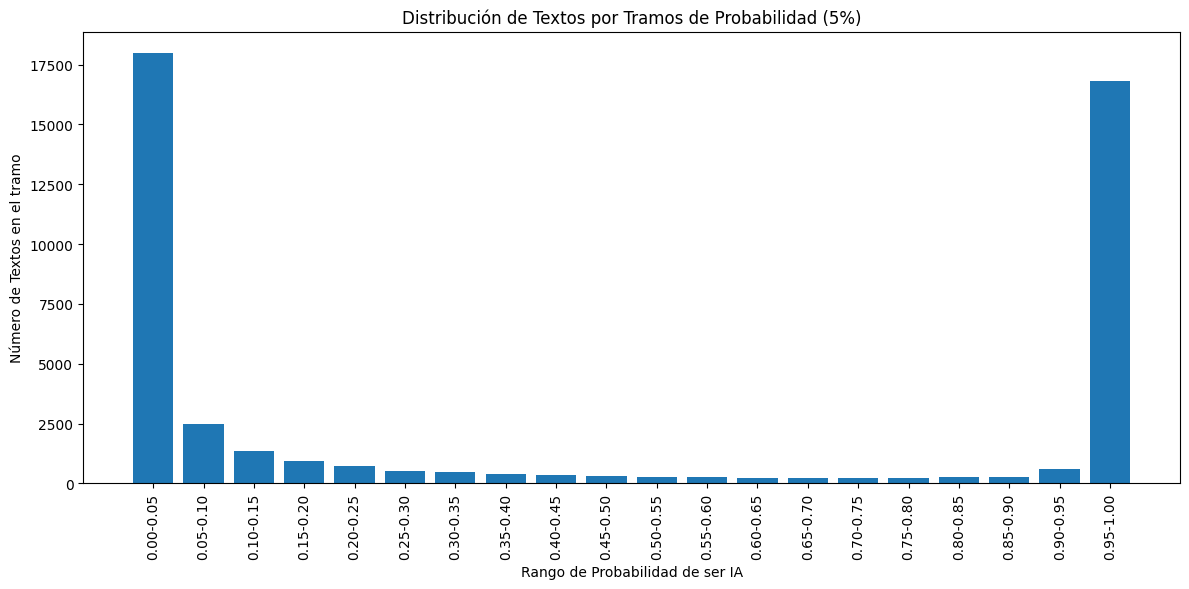

In [56]:
plt.figure(figsize=(12, 6))
plt.bar(tranche_counts.index, tranche_counts.values)

# Ajustar etiquetas del eje x para mostrar rangos de probabilidad
plt.xticks(tranche_counts.index, [f"{tranche_bins[i]:.2f}-{tranche_bins[i+1]:.2f}" for i in tranche_counts.index])

plt.xlabel('Rango de Probabilidad de ser IA')
plt.ylabel('Número de Textos en el tramo')
plt.title('Distribución de Textos por Tramos de Probabilidad (5%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-57-51610589ad53>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_counts = log_data_sorted.groupby('grupo')['text'].count()


Grupo: 0
Número total de textos: 44868
--------------------
Grupo: 1
Número total de textos: 0
--------------------
Grupo: 2
Número total de textos: 0
--------------------


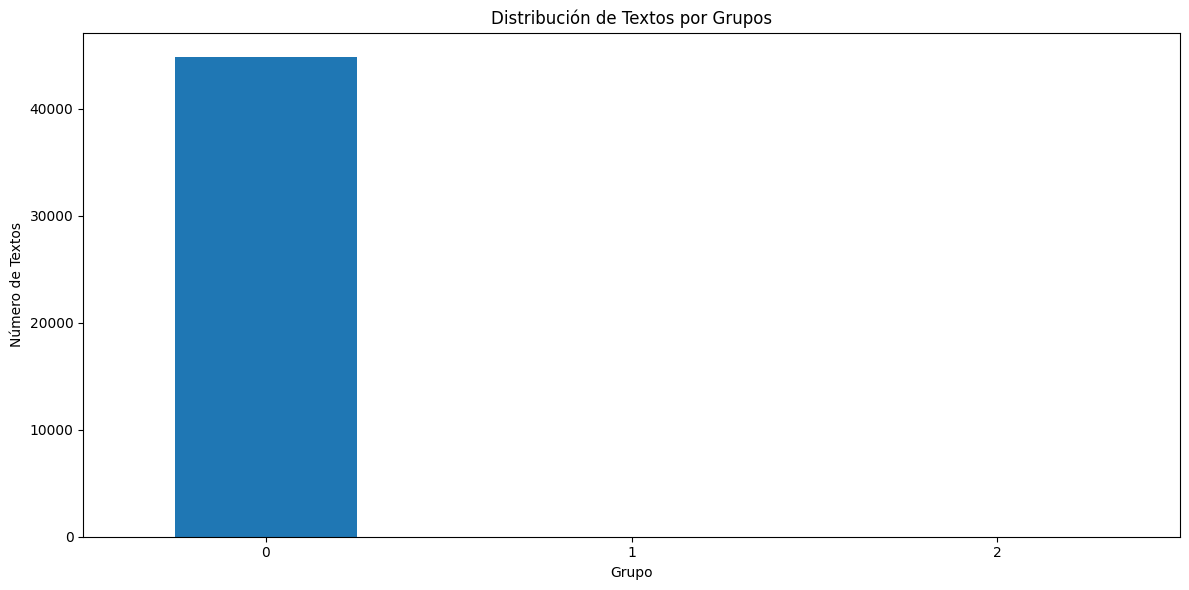

In [57]:
tranche_counts_mid = tranche_counts.drop(index=[1, 20], errors='ignore')

# Calcular los cuantiles para dividir en 3 tramos
quantiles = tranche_counts_mid.quantile([1/3, 2/3])

# Asignar los tramos a una nueva columna 'grupo'
log_data_sorted['grupo'] = pd.cut(
    log_data_sorted['tranche'],
    bins=[-1] + list(quantiles) + [float('inf')],
    labels=[0, 1, 2],
    include_lowest=True,
    duplicates='drop'
)


# Agrupar por 'grupo' y contar textos
grupo_counts = log_data_sorted.groupby('grupo')['text'].count()

# Mostrar resultados
for grupo, count in grupo_counts.items():
    print(f"Grupo: {grupo}")
    print(f"Número total de textos: {count}")
    print("-" * 20)

# Visualizar en gráfico de barras
grupo_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Grupo')
plt.ylabel('Número de Textos')
plt.title('Distribución de Textos por Grupos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Análisis de Falsos Positivos: Logistic Regression
Frecuencia de 'source':
source
persuade_corpus    1948
train_essays         65
Name: count, dtype: int64

Frecuencia de 'prompt_name':
prompt_name
Community service                        248
Distance learning                        238
Grades for extracurricular activities    206
Summer projects                          185
Cell phones at school                    167
Exploring Venus                          135
Does the electoral college work?         134
Mandatory extracurricular activities     128
Phones and driving                       102
Car-free cities                           97
Facial action coding system               87
Seeking multiple opinions                 84
"A Cowboy Who Rode the Waves"             82
The Face on Mars                          61
Driverless cars                           59
Name: count, dtype: int64


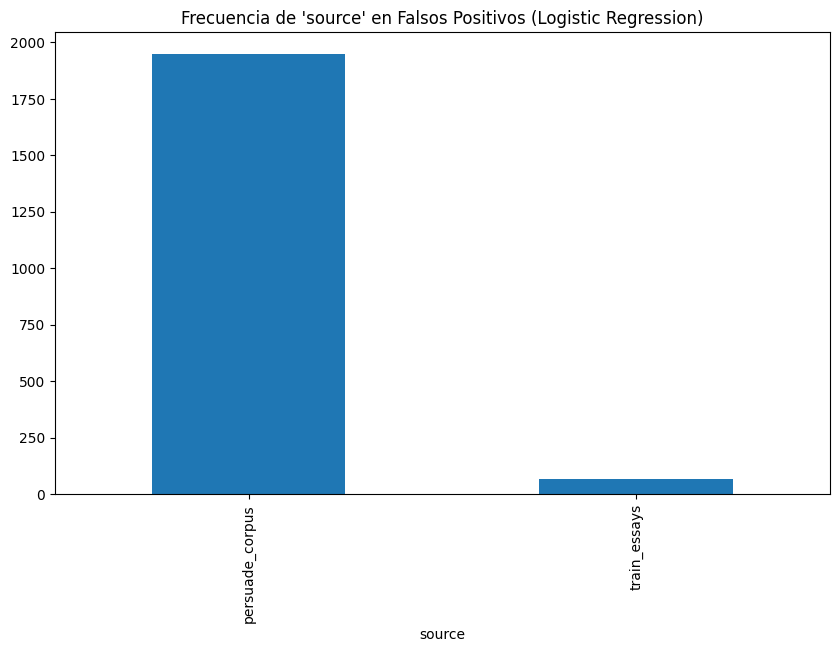

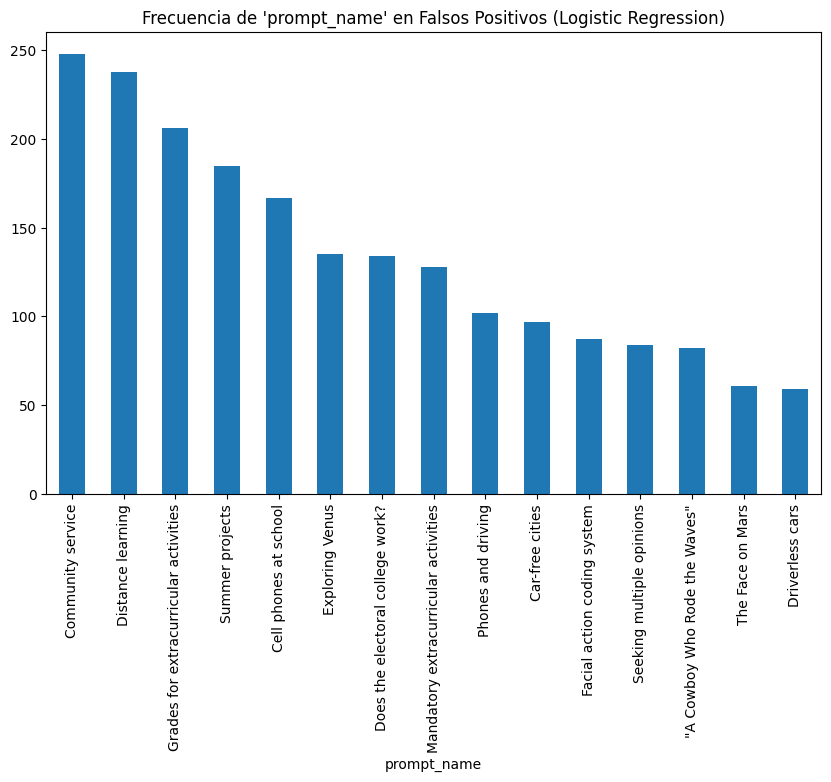


Análisis de Falsos Positivos: XGBoost
Frecuencia de 'source':
source
persuade_corpus    1864
train_essays         65
Name: count, dtype: int64

Frecuencia de 'prompt_name':
prompt_name
Community service                        260
Grades for extracurricular activities    199
Cell phones at school                    199
Distance learning                        193
Summer projects                          180
Mandatory extracurricular activities     121
Does the electoral college work?         120
Car-free cities                          102
Phones and driving                       101
Seeking multiple opinions                 84
The Face on Mars                          84
Exploring Venus                           83
"A Cowboy Who Rode the Waves"             81
Driverless cars                           69
Facial action coding system               53
Name: count, dtype: int64


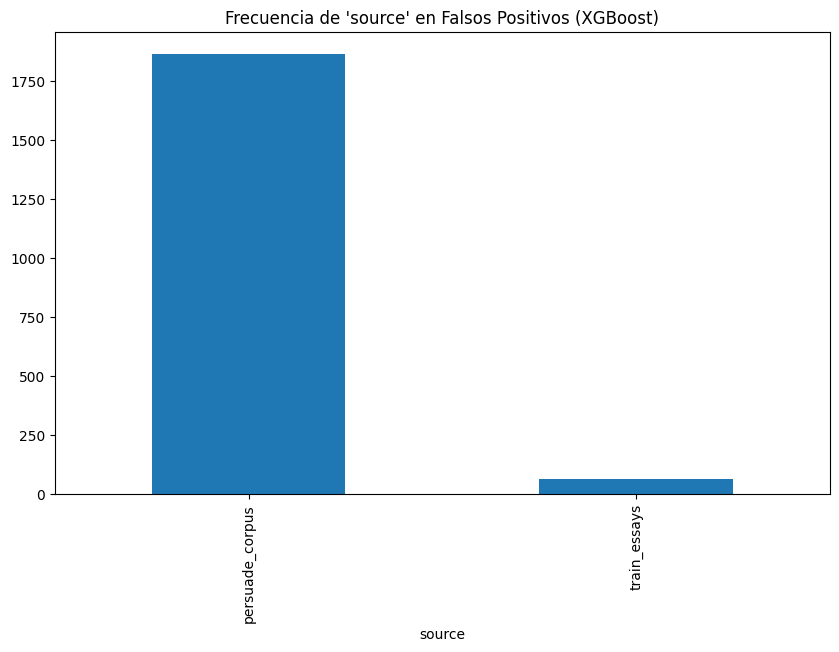

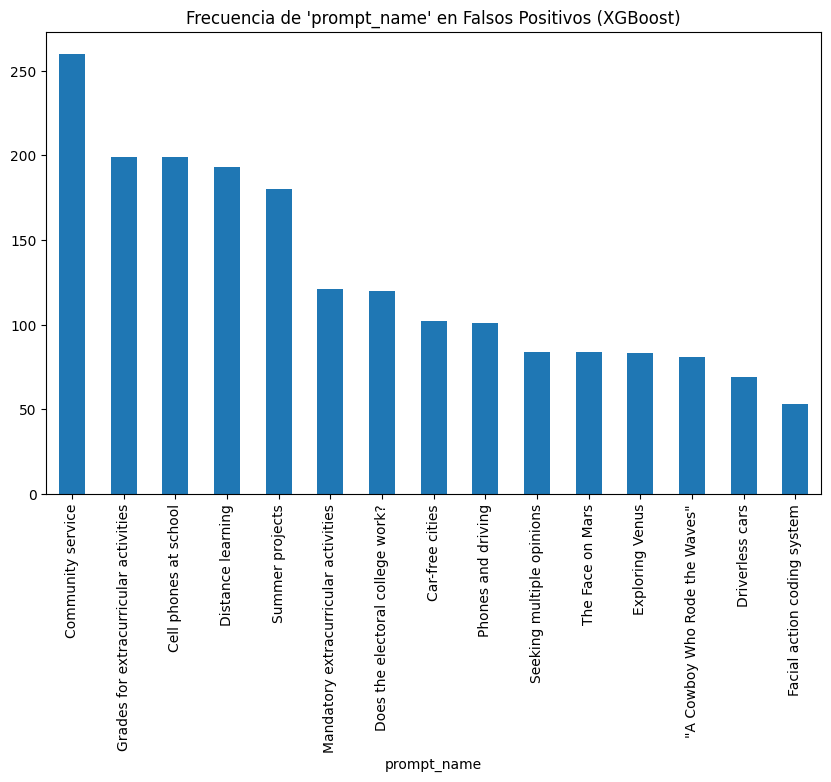


Análisis de Falsos Positivos: LightGBM
Frecuencia de 'source':
source
persuade_corpus    1815
train_essays         63
Name: count, dtype: int64

Frecuencia de 'prompt_name':
prompt_name
Community service                        266
Cell phones at school                    203
Distance learning                        195
Grades for extracurricular activities    195
Summer projects                          163
Mandatory extracurricular activities     115
Does the electoral college work?         110
Car-free cities                           97
Phones and driving                        87
Exploring Venus                           85
The Face on Mars                          84
"A Cowboy Who Rode the Waves"             80
Seeking multiple opinions                 75
Driverless cars                           72
Facial action coding system               51
Name: count, dtype: int64


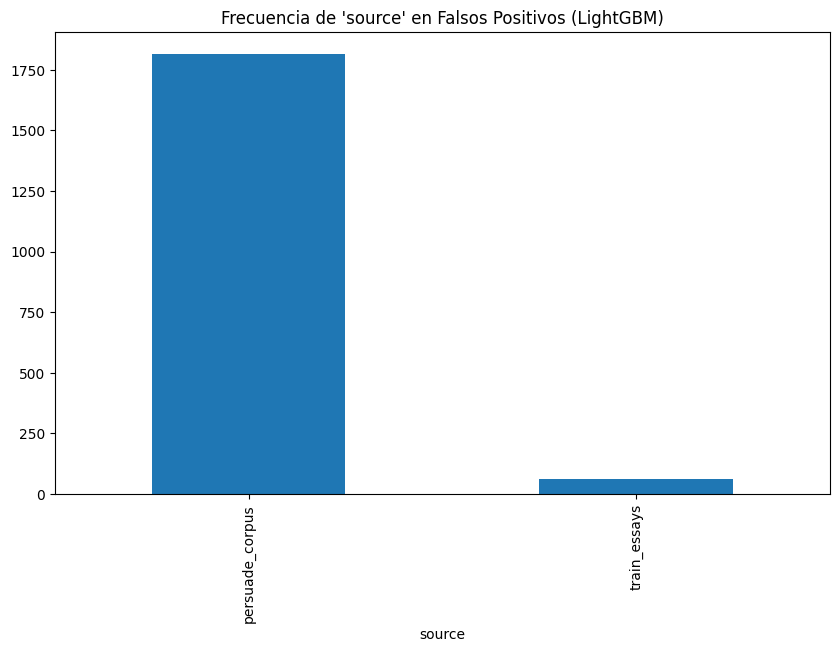

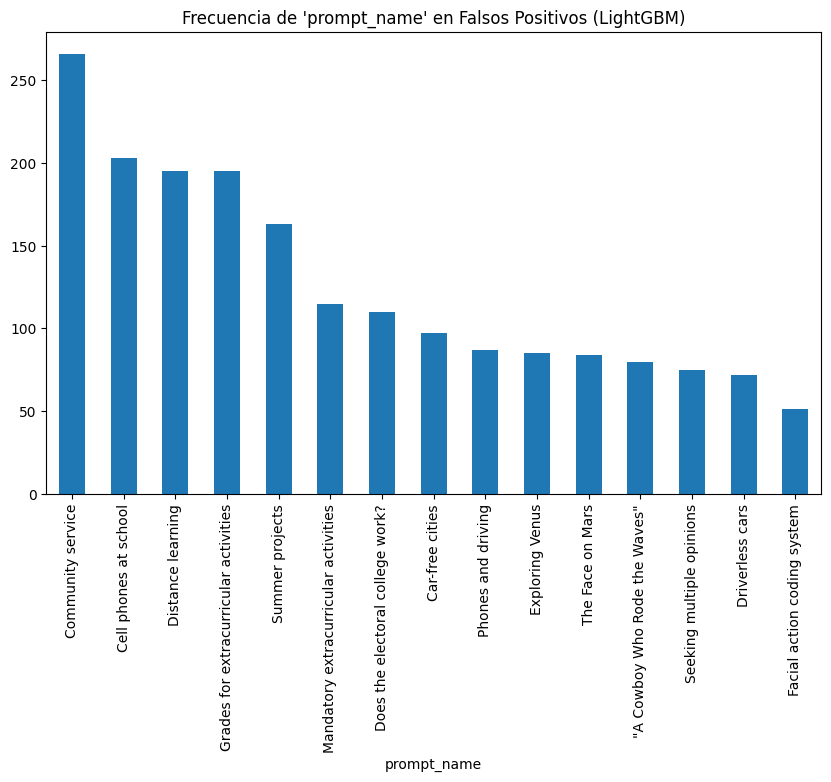


Análisis de Falsos Positivos: Neural Network
Frecuencia de 'source':
source
persuade_corpus    1843
train_essays         59
Name: count, dtype: int64

Frecuencia de 'prompt_name':
prompt_name
Community service                        234
Distance learning                        213
Grades for extracurricular activities    186
Summer projects                          180
Cell phones at school                    147
Exploring Venus                          125
Does the electoral college work?         121
Mandatory extracurricular activities     120
Car-free cities                           99
Phones and driving                        93
Seeking multiple opinions                 89
Facial action coding system               83
"A Cowboy Who Rode the Waves"             82
Driverless cars                           67
The Face on Mars                          63
Name: count, dtype: int64


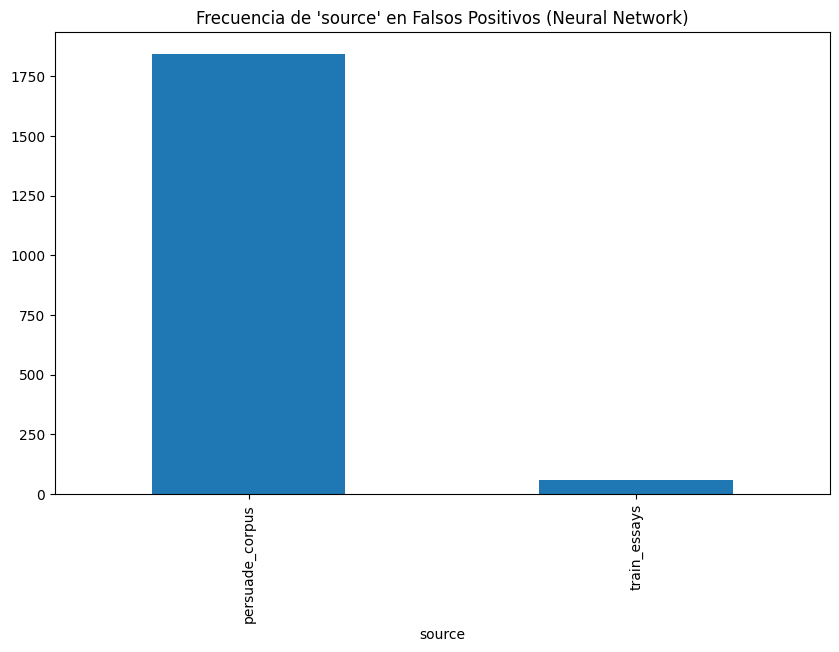

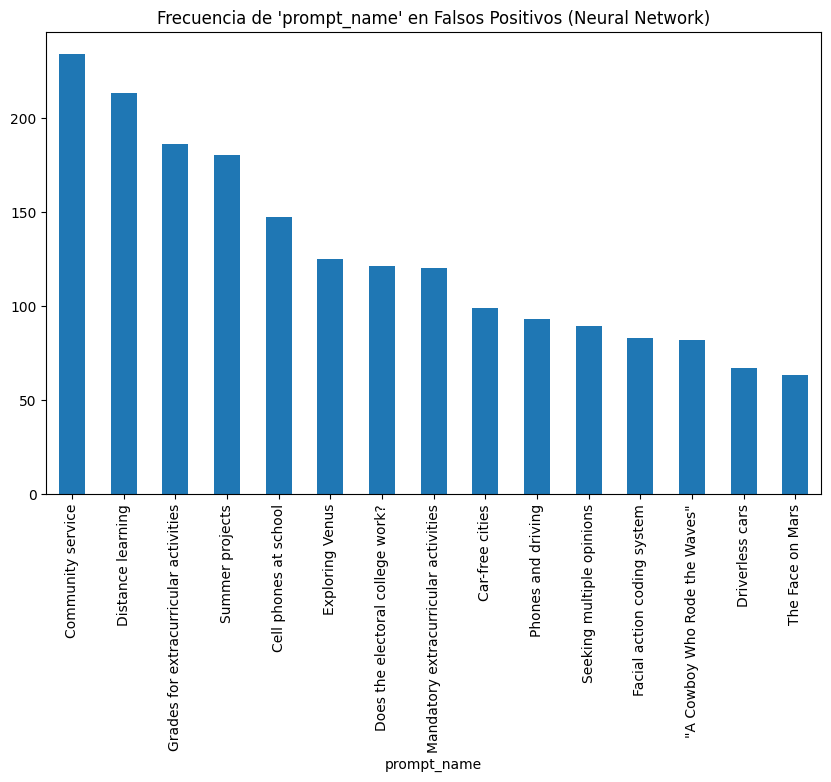

In [16]:
import pandas as pd

# Función para analizar los falsos positivos
def analyze_false_positives(y_true, y_pred, data, model_name):
    """
    Analiza los falsos positivos en el dataset.
    Args:
        y_true (array): Etiquetas verdaderas.
        y_pred (array): Predicciones del modelo.
        data (DataFrame): Dataset original.
        model_name (str): Nombre del modelo.
    """
    # Identificar índices de falsos positivos
    false_positive_indices = (y_true == 0) & (y_pred == 1)

    # Filtrar los falsos positivos del dataset
    false_positives = data[false_positive_indices]

    # Contar frecuencia de 'source' y 'prompt_name'
    source_counts = false_positives['source'].value_counts()
    prompt_counts = false_positives['prompt_name'].value_counts()

    # Mostrar resultados
    print(f"\nAnálisis de Falsos Positivos: {model_name}")
    print("Frecuencia de 'source':")
    print(source_counts)
    print("\nFrecuencia de 'prompt_name':")
    print(prompt_counts)

    # Visualizar los resultados
    source_counts.plot(kind='bar', title=f"Frecuencia de 'source' en Falsos Positivos ({model_name})", figsize=(10, 6))
    plt.show()

    prompt_counts.plot(kind='bar', title=f"Frecuencia de 'prompt_name' en Falsos Positivos ({model_name})", figsize=(10, 6))
    plt.show()

# Análisis para cada modelo
analyze_false_positives(y_true, logistic_preds, data_validation, "Logistic Regression")
analyze_false_positives(y_true, xgboost_preds_binary, data_validation, "XGBoost")
analyze_false_positives(y_true, lightgbm_preds_binary, data_validation, "LightGBM")
analyze_false_positives(y_true, neural_preds, data_validation, "Neural Network")


In [17]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# Función para evaluar diferentes umbrales
def evaluate_thresholds(y_true, probs, thresholds, model_name):
    """
    Evalúa diferentes umbrales y muestra métricas clave para cada uno.
    Args:
        y_true (array): Etiquetas verdaderas.
        probs (array): Probabilidades predichas.
        thresholds (list): Lista de umbrales a evaluar.
        model_name (str): Nombre del modelo.
    """
    print(f"\nEvaluación de Umbrales para {model_name}")
    results = []
    for threshold in thresholds:
        # Generar predicciones binarias según el umbral
        preds = (probs >= threshold).astype(int)

        # Calcular métricas
        precision = precision_score(y_true, preds, zero_division=0)
        recall = recall_score(y_true, preds, zero_division=0)
        auc = roc_auc_score(y_true, probs)
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        results.append({
            "Threshold": threshold,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "AUC": auc
        })

    # Mostrar resultados como DataFrame
    results_df = pd.DataFrame(results)
    print(results_df)
    return results_df

# Lista de umbrales a evaluar
thresholds = np.linspace(0.1, 0.9, 9)

# Evaluar Logistic Regression
logistic_results = evaluate_thresholds(y_true, logistic_probs, thresholds, "Logistic Regression")

# Evaluar XGBoost
xgboost_results = evaluate_thresholds(y_true, xgboost_probs, thresholds, "XGBoost")

# Evaluar LightGBM
lightgbm_results = evaluate_thresholds(y_true, lightgbm_probs, thresholds, "LightGBM")

# Evaluar Neural Network
neural_results = evaluate_thresholds(y_true, neural_probs, thresholds, "Neural Network")



Evaluación de Umbrales para Logistic Regression
   Threshold  Precision    Recall  F1-Score       AUC
0        0.1   0.713993  0.996171  0.831802  0.996023
1        0.2   0.787064  0.995199  0.878978  0.996023
2        0.3   0.833477  0.994342  0.906831  0.996023
3        0.4   0.868171  0.993656  0.926685  0.996023
4        0.5   0.896130  0.992570  0.941888  0.996023
5        0.6   0.919788  0.990913  0.954026  0.996023
6        0.7   0.940515  0.989484  0.964378  0.996023
7        0.8   0.962963  0.986683  0.974679  0.996023
8        0.9   0.982929  0.977368  0.980140  0.996023

Evaluación de Umbrales para XGBoost
   Threshold  Precision    Recall  F1-Score       AUC
0        0.1   0.873468  0.989484  0.927863  0.991484
1        0.2   0.885043  0.986512  0.933027  0.991484
2        0.3   0.891821  0.985197  0.936186  0.991484
3        0.4   0.895769  0.983826  0.937735  0.991484
4        0.5   0.899042  0.981768  0.938586  0.991484
5        0.6   0.903328  0.980511  0.940338  0.991

<Axes: title={'center': 'Logistic Regression Metrics'}, xlabel='Threshold'>

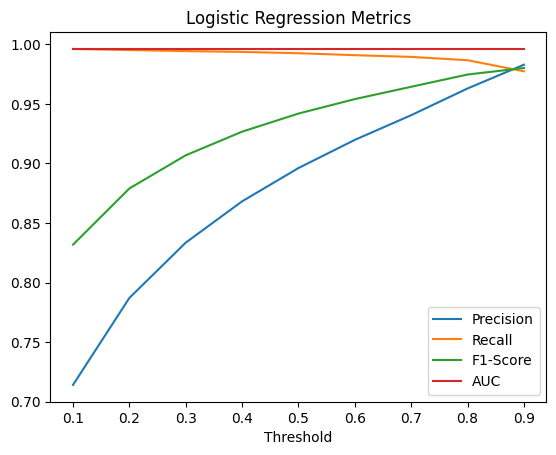

In [18]:

logistic_results.plot(x='Threshold', y=['Precision', 'Recall', 'F1-Score', 'AUC'], kind='line', title='Logistic Regression Metrics')

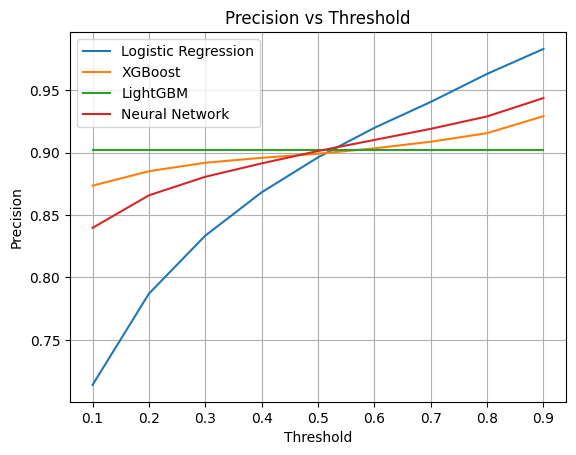

In [19]:
import matplotlib.pyplot as plt

logistic_label = "Logistic Regression"
xgboost_label = "XGBoost"
lightgbm_label = "LightGBM"
neural_label = "Neural Network"

plt.plot(logistic_results['Threshold'], logistic_results['Precision'], label=logistic_label)
plt.plot(xgboost_results['Threshold'], xgboost_results['Precision'], label=xgboost_label)
plt.plot(lightgbm_results['Threshold'], lightgbm_results['Precision'], label=lightgbm_label)
plt.plot(neural_results['Threshold'], neural_results['Precision'], label=neural_label)

plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs Threshold')
plt.legend()
plt.grid(True)

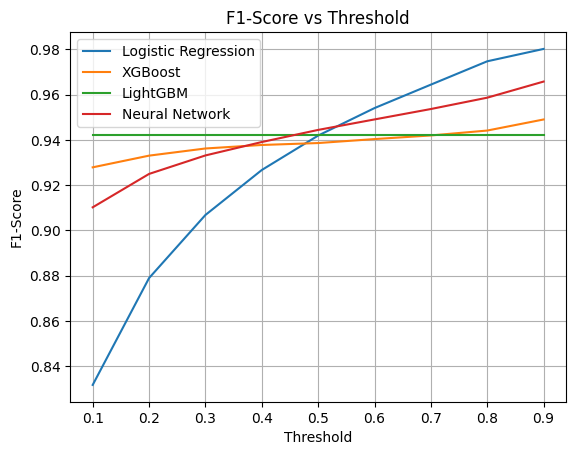

In [20]:
column_logistic = logistic_results['F1-Score']
column_xgboost = xgboost_results['F1-Score']
column_lightgbm = lightgbm_results['F1-Score']
column_neural = neural_results['F1-Score']

plt.plot(logistic_results['Threshold'], column_logistic, label=logistic_label)
plt.plot(xgboost_results['Threshold'], column_xgboost, label=xgboost_label)
plt.plot(lightgbm_results['Threshold'], column_lightgbm, label=lightgbm_label)
plt.plot(neural_results['Threshold'], column_neural, label=neural_label)

plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Threshold')
plt.legend()
plt.grid(True)

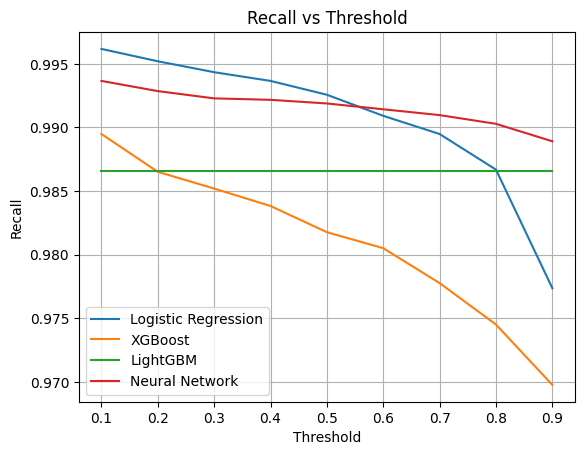

In [21]:
column_logistic = logistic_results['Recall']
column_xgboost = xgboost_results['Recall']
column_lightgbm = lightgbm_results['Recall']
column_neural = neural_results['Recall']

plt.plot(logistic_results['Threshold'], column_logistic, label=logistic_label)
plt.plot(xgboost_results['Threshold'], column_xgboost, label=xgboost_label)
plt.plot(lightgbm_results['Threshold'], column_lightgbm, label=lightgbm_label)
plt.plot(neural_results['Threshold'], column_neural, label=neural_label)

plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs Threshold')
plt.legend()
plt.grid(True)

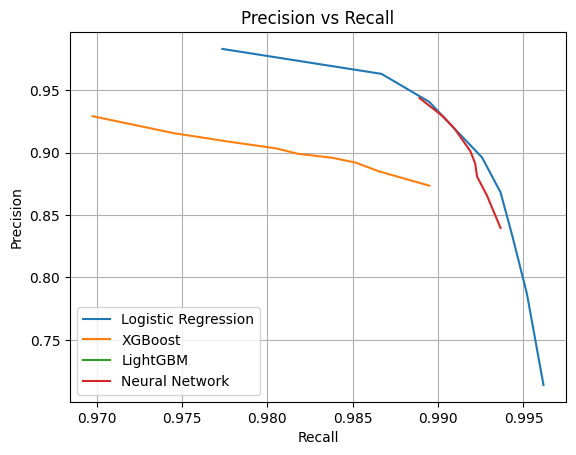

In [22]:
column_logistic = logistic_results['Precision']
column_xgboost = xgboost_results['Precision']
column_lightgbm = lightgbm_results['Precision']
column_neural = neural_results['Precision']

plt.plot(logistic_results['Recall'], column_logistic, label=logistic_label)
plt.plot(xgboost_results['Recall'], column_xgboost, label=xgboost_label)
plt.plot(lightgbm_results['Recall'], column_lightgbm, label=lightgbm_label)
plt.plot(neural_results['Recall'], column_neural, label=neural_label)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.legend()
plt.grid(True)